<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Prediction_BostonHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

refer to

https://medium.com/analytics-vidhya/boston-house-price-prediction-using-machine-learning-ad3750a866cd

https://www.kaggle.com/shreayan98c/boston-house-price-prediction

Comparison between algorithms
1. Neural Network (TensorFlow Keras)
2. Linear Regression (Scikit-learn)
3. SVM (Support Vector Machines) Regression (Scikit-learn)
4. Random Forest Regression (Scikit-learn)
5. XGBoost Regression (XGBoost)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing 
import sklearn.linear_model 
import sklearn.ensemble 
import xgboost 

Train data, load from sklearn dataset load_boston()
As well we can also able to get the dataset from the sklearn datasets.
Yup! It’s available into the sklearn Dataset.

In [4]:
boston = sklearn.datasets.load_boston()
X = boston['data']
y = boston['target']
features = boston['feature_names']
print(features)
print(X.shape, y.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13) (506,)


variables
1. CRIM per capital crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centers
9. RAD index of accessibility to radial highways
10.TAX full-value property-tax rate per 10,000 USD
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
13. LSTAT % lower status of the population

In [5]:
df = pd.DataFrame(X, columns=features, index=None)
df['Price'] = y
print(df.head())
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       Price
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

In [6]:
corr = df.corr() # Correlation between parameters
print("Correlation:\n",corr)

Correlation:
              CRIM        ZN     INDUS  ...         B     LSTAT     Price
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800

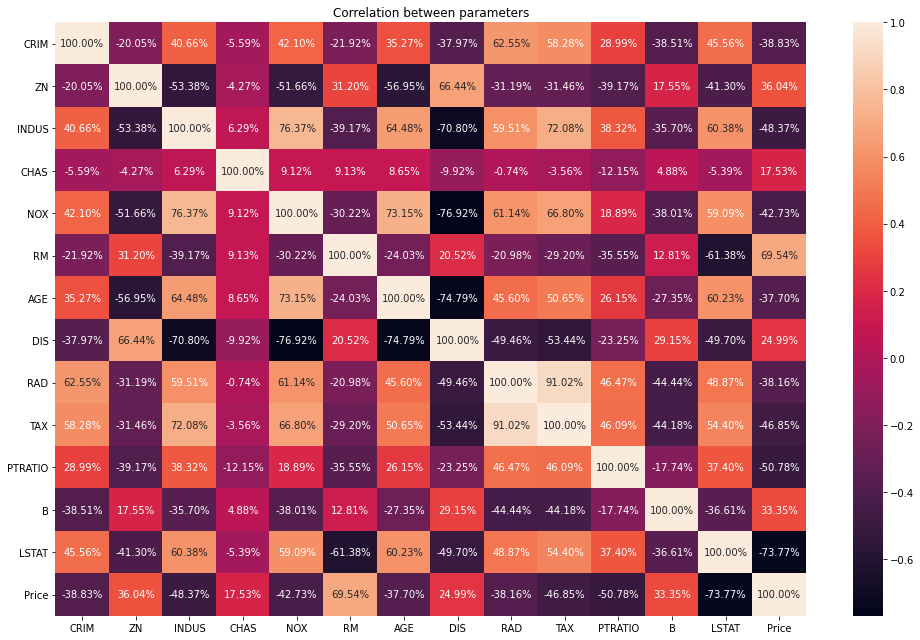

In [7]:
plt.figure(figsize=(14,9))
sns.heatmap(corr, fmt='.2%', annot=True)
plt.title("Correlation between parameters")
plt.tight_layout()
plt.show()

In [15]:
prediction=[]

In [17]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

0.7406426641094095


In [18]:
sc = sklearn.preprocessing.StandardScaler()
x_ = sc.fit_transform(X)
model = sklearn.svm.SVR()
model.fit(x_, y)
y_pred = model.predict(x_)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

0.7028285706092579


In [19]:
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

0.9822773337283877


In [20]:
model = xgboost.XGBRegressor()
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

[07:59:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9719646825920587


In [21]:
in_layer = tf.keras.layers.Input(shape=[13])
out_layer = tf.keras.layers.Dense(1)(in_layer) 
model = tf.keras.models.Model(in_layer, out_layer)
model.compile(loss='mse')
model.summary()
model.fit(X, y, epochs=3000) 
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 0s 2ms/step - loss: 29.4184
Epoch 502/3000
16/16 [==============================] - 0s 2ms/step - loss: 31.2126
Epoch 503/3000
16/16 [==============================] - 0s 1ms/step - loss: 28.8594
Epoch 504/3000
16/16 [==============================] - 0s 2ms/step - loss: 31.3072
Epoch 505/3000
16/16 [==============================] - 0s 2ms/step - loss: 29.0883
Epoch 506/3000
16/16 [==============================] - 0s 2ms/step - loss: 30.8628
Epoch 507/3000
16/16 [==============================] - 0s 1ms/step - loss: 32.9551
Epoch 508/3000
16/16 [==============================] - 0s 2ms/step - loss: 30.5586
Epoch 509/3000
16/16 [==============================] - 0s 2ms/step - loss: 29.5534
Epoch 510/3000
16/16 [==============================] - 0s 2ms/step - loss: 31.2164
Epoch 511/3000
16/16 [==============================] - 0s 2ms/step - loss: 31.4521
Epoch 512/3000
16/16 [==================

In [31]:
Model = ['Linear Regression', 'SVM Regression', 'Random Forest Regression',
         'XGBoost Regression', 'Neural Network']

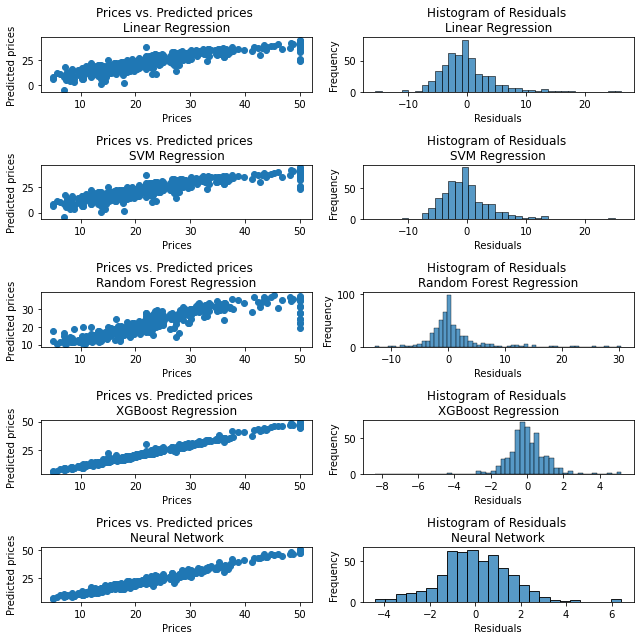

In [32]:
plt.figure(figsize=(9,9))
for i in range(len(Model)):
  plt.subplot(5,2,i*2+1)
  plt.scatter(y, prediction[i])
  plt.title("Prices vs. Predicted prices \n"+Model[i])
  plt.xlabel("Prices")
  plt.ylabel("Predicted prices")
  plt.subplot(5,2,i*2+2)
  sns.histplot(y-prediction[i])
  plt.title("Histogram of Residuals \n"+Model[i])
  plt.xlabel("Residuals")
  plt.ylabel("Frequency")
plt.tight_layout()
plt.show() 